In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.8.0'

In [4]:
tf.__version__

'2.8.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

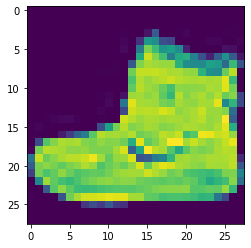

In [6]:
plt.imshow(X_train_full[0])

In [7]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Data **Normalization**

In [8]:
X_train_n = X_train_full / 255
X_test_n = X_test / 255

Train_test_split
traning set, validation set, test set

In [9]:
X_valid ,X_train = X_train_n[:5000], X_train_n[5000:]
y_valid ,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape =[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


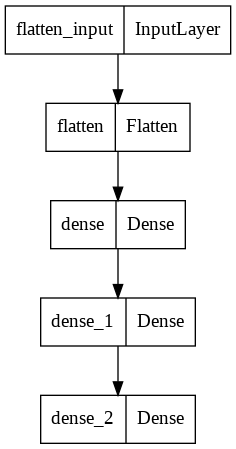

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics =["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50 , validation_data = (X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/50
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/50
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/50
1322/1719 [======================>.......] - ETA: 2s - loss: 0.3969 - accuracy: 0.8606

In [ ]:
model_history.params

In [ ]:
model_history.history

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:4]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred